# DAMA50: Mathematics for machine learning

## Written assignment 5

### Georgios Zavlanis


### Problem 7

a. First, we have to "translate" the problem into a linear programming problem. The process can be seen below:

We have 42 million dollars in total, for three types of investments.
- Let be $x_1$ for treasury notes, $x_2$ for bonds and $x_3$ for stocks.
- We have a minimum investment of 3 million dollars in each category, which means that $ x_1, x_2, x_3 \ge 3000000 $.
- Also, at least half of the total funds allocated to treasury notes and bonds, which means that $ x_1+x_2 \ge 21000000 $.
- Finally, the investment in bonds must not exceed twice the investment in treasury notes, which means that $ x_2 \le 2x_1 $ or $ x_2 - 2x_1 \le 0 $.

We need to maximize the returns, so we need max $ 0.07x_1 + 0.09x_2 + 0.1x_3 $.

b. So now, we are ready to solve the linear problem:

In [1]:
# Define the Linear Programming Problem (LP)
p = MixedIntegerLinearProgram(maximization = True)
v = p.new_variable(real = True, nonnegative = True)
x, y, z = v['x'], v['y'], v['z']

# Set the cost function
p.set_objective(0.07*x + 0.09*y + 0.1*z)

# and the constraints
p.add_constraint(x + y + z == 42000000)
p.add_constraint(x + y >= 21000000)
p.add_constraint(2*x >= y)
p.add_constraint(x >= 3000000)
p.add_constraint(y >= 3000000)
p.add_constraint(z >= 3000000)

# Solve the LP problem
p.solve()

3850000.0

In [2]:
p.get_values(x),p.get_values(y),p.get_values(z)

(7000000.0, 14000000.0, 21000000.0)

### Problem 8

First, let's create our function:

In [3]:
%display latex
x, y = var('x, y')
f(x, y) = exp(x)*(4*x^2 + 2*y^2 + 4*x*y + 2*y + 1); f(x, y)

(4*x^2 + 4*x*y + 2*y^2 + 2*y + 1)*e^x

a. To find the stationary points using the analytically method, we follow the process below:

In [4]:
# Find the gradient
gradient = f(x, y).gradient(); gradient

((4*x^2 + 4*x*y + 2*y^2 + 2*y + 1)*e^x + 4*(2*x + y)*e^x, 2*(2*x + 2*y + 1)*e^x)

In [5]:
# Set gradient equals with zero to find solutions
eq = [gradient[0] == 0, gradient[1] == 0]; eq

[(4*x^2 + 4*x*y + 2*y^2 + 2*y + 1)*e^x + 4*(2*x + y)*e^x == 0,
 2*(2*x + 2*y + 1)*e^x == 0]

In [6]:
# Solve the equation
s = solve(eq,[x, y]);s

[[x == (1/2), y == -1], [x == (-3/2), y == 1]]

So, above we have the stationary points.

In [7]:
# Find the Hessian matrix:
H = f(x,y).hessian(); H

[(4*x^2 + 4*x*y + 2*y^2 + 2*y + 1)*e^x + 8*(2*x + y)*e^x + 8*e^x                                   2*(2*x + 2*y + 1)*e^x + 4*e^x]
[                                  2*(2*x + 2*y + 1)*e^x + 4*e^x                                                           4*e^x]

In [8]:
# Calculate the Eigenvalues
ee = H.subs(s[-1]).eigenvalues()
n(ee[0]), n(ee[1])

(-0.551608091547748, 1.44412873214147)

So finally, we have one positive and one negative Hessian eigenvalues, and thus we have a saddle point.

b. Let's make our plot:

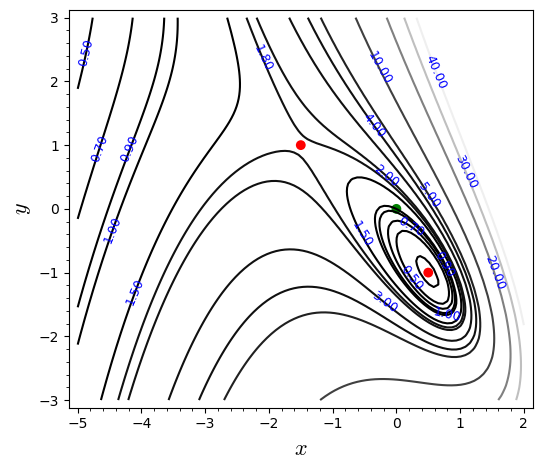

In [9]:
# if i use the f directly inside the contour plot function the plot was empty, I don't know why, so I wrote again
contour_plot(f(x, y),(x,-5,2),(y,-3,3), contours = [-1,.1,.5,.7,.9,1,1.5,1.8,2,3,4,5,10,20,30,40],\
    fill=False,labels=True,axes_labels=["$x$","$y$"])\
    +point((0,0),size=50,color="green")+point((1/2, -1),size=50,color="red")+point((-3/2, 1),size=50,color="red")

c. To solve this query we follow the steps below:

In [10]:
# we set our initial point:
x0 = [-1, 2]

First, we will use the Newton conjugate gradient, which needs the gradient and the Hessian to work:

In [11]:
minimize(f(x, y), x0, algorithm = 'ncg')

(-18.79908874782276, 4.2175637488406394)

Then, we will use the Simplex algorithm:

In [12]:
minimize(f(x, y), x0, algorithm = 'simplex')

(0.49999911066660385, -0.9999631034560157)

We can see that there is a discrepancy in the results produced of the minimum. But in all cases, we have a positive and a negative value.

## An extra query:

Trying to solve the Problem 10 to compare hand and Sage calculation results:

In [2]:
%display latex
x, y = var('x, y')
f(x, y) = ln(exp(x) + exp(y)); f(x, y)

log(e^x + e^y)

In [3]:
H = f(x,y).hessian(); H

[e^x/(e^x + e^y) - e^(2*x)/(e^x + e^y)^2                -e^(x + y)/(e^x + e^y)^2]
[               -e^(x + y)/(e^x + e^y)^2 e^y/(e^x + e^y) - e^(2*y)/(e^x + e^y)^2]

In [5]:
gradient = f(x, y).gradient(); gradient

(e^x/(e^x + e^y), e^y/(e^x + e^y))

In [6]:
eq = [gradient[0] == 0, gradient[1] == 0]; eq

[e^x/(e^x + e^y) == 0, e^y/(e^x + e^y) == 0]

In [7]:
s = solve(eq,[x, y]);s

[]

In [8]:
H.eigenvalues()

[2*(e^(3*x + y) + 2*e^(2*x + 2*y) + e^(x + 3*y))/(e^(4*x) + 4*e^(3*x + y) + 6*e^(2*x + 2*y) + 4*e^(x + 3*y) + e^(4*y)),
 0]

In [14]:
plot3d(f(x, y), (x, -5, 5), (y, -5, 5))

Graphics3d Object